# Loading data

In [3]:
import pandas as pd
import numpy as np
import os 
# load the pkl file 
data_folder = "/teamspace/studios/this_studio/" 

df_ansa = pd.read_pickle(os.path.join(data_folder, '3_days_ansa_parsed_df.pkl'))
df_ilpost = pd.read_pickle(os.path.join(data_folder, '3_days_ilpost_parsed_df.pkl'))
df_open = pd.read_pickle(os.path.join(data_folder, '3_days_open_parsed_df.pkl'))

# load the concatenated pkl file /content/df_scapred_concat.pkl
df_concatenated = pd.read_pickle(os.path.join(data_folder, '3_days_concat_df.pkl'))

# load the aggregated pkl file /content/aggregated_data_to_save_in_db.pkl
df_aggregated = pd.read_pickle(os.path.join(data_folder, '3_new_days_mixtral_integrated_df.pkl'))

In [4]:
# number of articles per site
card_ansa = len(df_ansa)
card_ilpost = len(df_ilpost)
card_open = len(df_open)

# number of articles
card_total = card_ansa + card_ilpost + card_open

print(f"Total number of articles: {card_total}", f"\nNumber of articles from ANSA: {card_ansa}", f"\nNumber of articles from IlPost: {card_ilpost}", f"\nNumber of articles from Open: {card_open}")

Total number of articles: 858 
Number of articles from ANSA: 652 
Number of articles from IlPost: 59 
Number of articles from Open: 147


Reduction % between scraped pages and aggregated ones

In [5]:
card_aggregated = len(df_aggregated)
aggregation_score = card_aggregated / card_total
print(f"Number of cards: {card_aggregated}")
print(f"Aggregation score: {round(aggregation_score, 4) * 100} %")

Number of cards: 224
Aggregation score: 26.11 %


### Obtaining the source statistics from the original data

In [6]:
from ast import Name
# Dictionary to map domains to source sites
domain_to_site_name = {
    'www.open.online': 'Open',
    'www.ansa.it': 'Ansa',
    'www.ilpost.it': 'Ilpost'
}

# Function to extract the source site
def extract_source_site(link, domain_to_site_name=domain_to_site_name)->str:
  """ Extracts the source site from the link. """
  for domain, Name in domain_to_site_name.items():
      if domain in link:
          return Name
  return "-1"  # If none of the specified domains are found

# Apply the function to create the new column
df_concatenated['source_site'] = df_concatenated['link'].apply(extract_source_site)

In [7]:
# Map sources to source_site in df_aggregated
df_aggregated['source_site'] = df_aggregated['sources'].apply(lambda sources: [df_concatenated["source_site"][source] for source in sources])

# Create a column with unique sources (ordered set)
df_aggregated['unique_sources'] = df_aggregated['source_site'].apply(set)

print(df_aggregated[['date', 'tags', 'unique_sources']].head(3))

                                                date        tags  \
2  NEW YORK,\n                          08 gennai...  Ultima ora   
7  NEW YORK,\n                          08 gennai...     Cultura   
9  RAFAH,\n                          04 gennaio 2...        ANSA   

  unique_sources  
2   {Open, Ansa}  
7   {Open, Ansa}  
9         {Ansa}  


In [8]:
df_aggregated["source_count"] = df_aggregated["unique_sources"].apply(len)

# Number of sources graphs

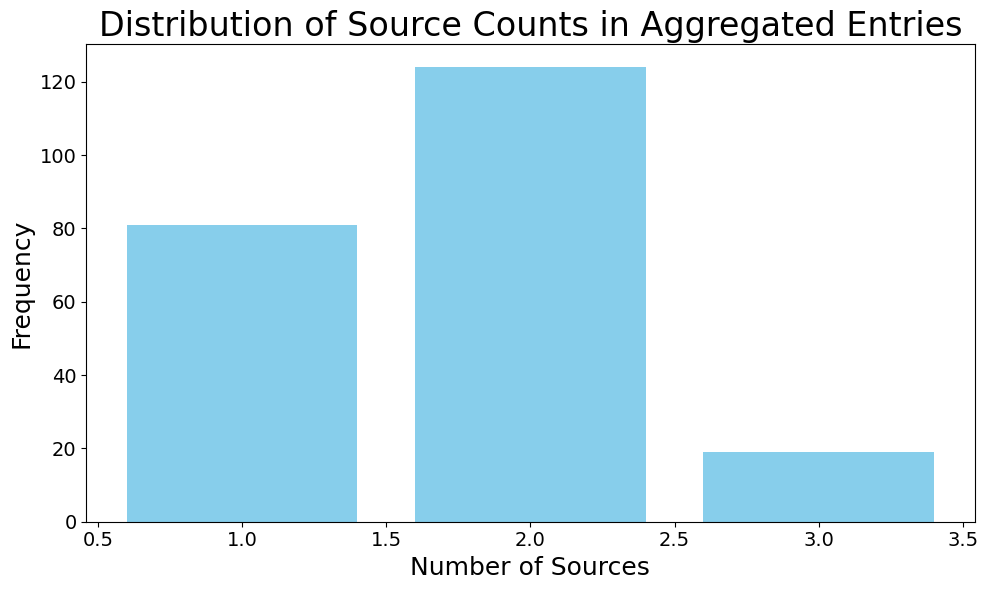

In [10]:
import matplotlib.pyplot as plt

# Calculate the number of sources for each entry
df_aggregated['num_sources'] = df_aggregated['sources'].apply(len)

# Create a bar chart to visualize the number of sources
plt.figure(figsize=(10, 6))
plt.bar(df_aggregated["source_count"].unique(), df_aggregated["source_count"].value_counts(), color='skyblue')  # Change color to skyblue
plt.xlabel("Number of Sources", fontsize=18)  # Increase x-label font size
plt.ylabel("Frequency", fontsize=18)  # Increase y-label font size
plt.title("Distribution of Source Counts in Aggregated Entries", fontsize=24)  # Increase title font size
plt.xticks(rotation=0, fontsize=14)  # Increase x-ticks font size
plt.yticks(fontsize=14)  # Increase y-ticks font size
plt.tight_layout()
plt.savefig('./img/Distribution_of_Source_Counts_in_Aggregated_Entries.png')
plt.show()

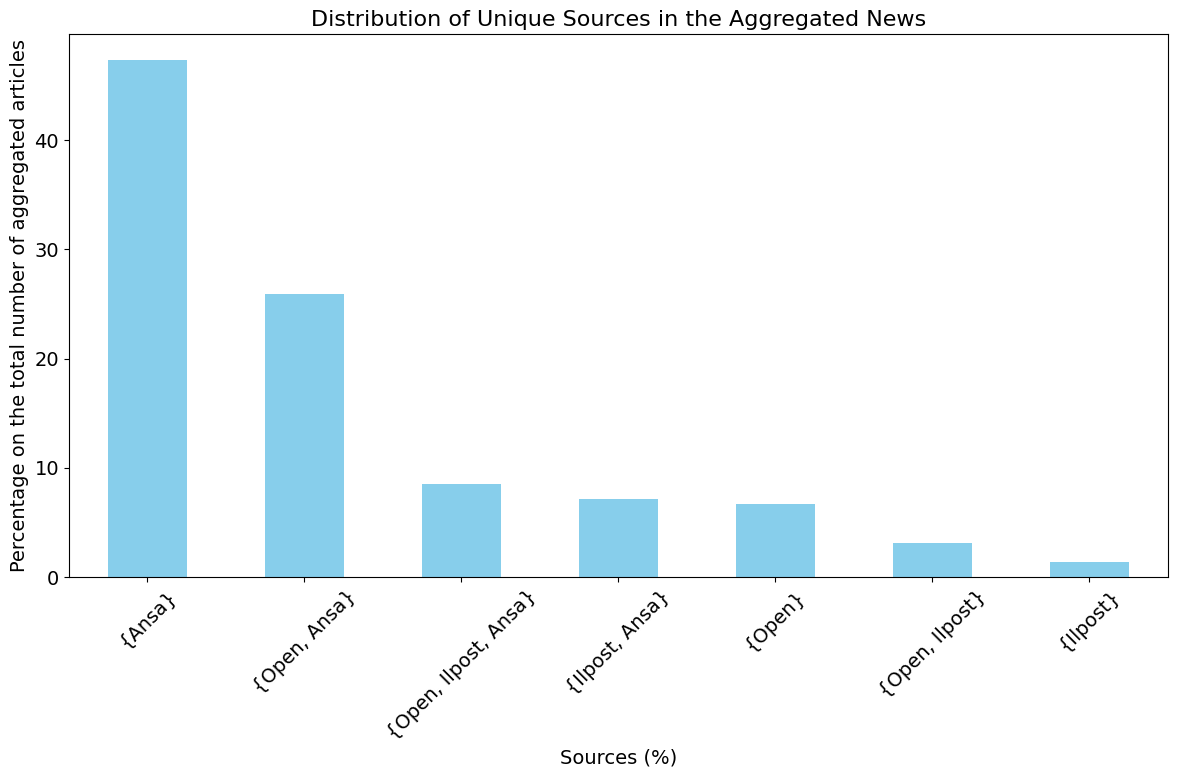

In [11]:
# Calculate percentages
import matplotlib.pyplot as plt
unique_source_counts = df_aggregated['unique_sources'].value_counts()
total_entries = len(df_aggregated)

unique_source_percentages = (unique_source_counts / total_entries) * 100

# Increase the font size
plt.rcParams.update({'font.size': 14})

# Create a bar plot
plt.figure(figsize=(12, 8))
unique_source_percentages.plot(kind='bar', color='skyblue')
plt.xlabel("Sources (%)")
plt.ylabel("Percentage on the total number of aggregated articles")
plt.title("Distribution of Unique Sources in the Aggregated News", fontsize=16)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig('./img/Distribution_of_Unique_Sources_in_the_Aggregated_News.png')
# Display the chart
plt.show()

Display the number numerical percentage of sources in the aggregated data

In [ ]:
unique_source_percentages

unique_sources
{Ansa}                  47.321429
{Ansa, Open}            25.892857
{Ansa, Ilpost, Open}     8.482143
{Ansa, Ilpost}           7.142857
{Open}                   6.696429
{Ilpost, Open}           3.125000
{Ilpost}                 1.339286
Name: count, dtype: float64

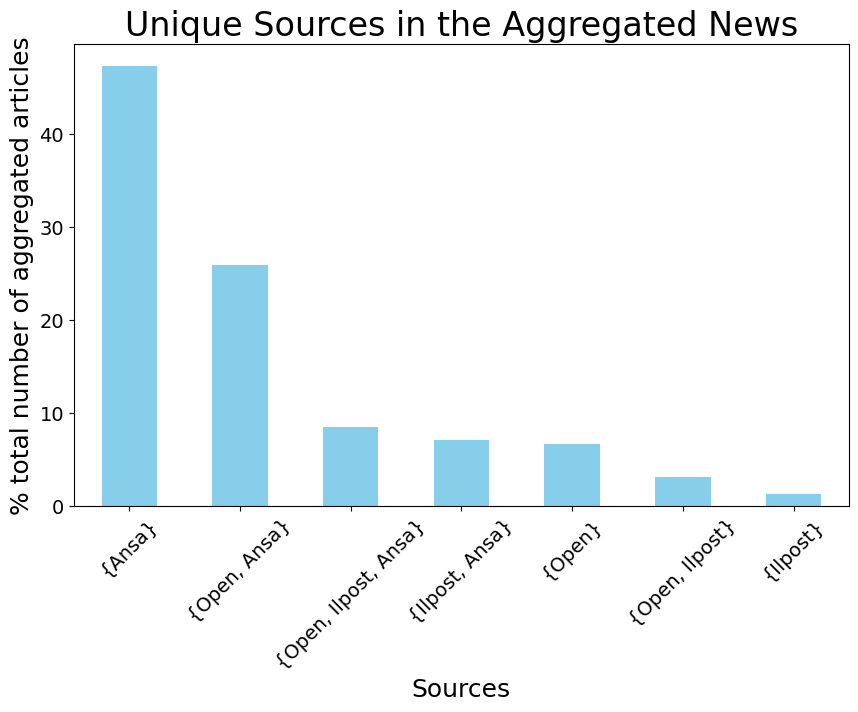

In [12]:
# Calculate percentages
total_entries = len(df_aggregated)
unique_source_percentages = (unique_source_counts / total_entries) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = unique_source_percentages.plot(kind='bar', color='skyblue')
plt.xlabel("Sources", fontsize=18)  # Increase x-label font size
plt.ylabel("% total number of aggregated articles", fontsize=18)  # Increase y-label font size
plt.title("Unique Sources in the Aggregated News", fontsize=24)  # Increase title font size

plt.xticks(rotation=45, fontsize=14)  # Increase x-ticks font size
plt.yticks(fontsize=14)  # Increase y-ticks font size
plt.savefig('./img/Unique_Sources_in_the_Aggregated_News.png')
# Display the chart
plt.show()

# Examples of clusters of news aggregated and summarized

In [ ]:
for i in df_aggregated['sources'][456]:
  print("Id News: {i} - Source: {source} \n\t- Title: {title} ".format(i=i, source=df_concatenated['source_site'][i], title=df_concatenated['title'][i]))

Id News: 456 - Source: Ilpost 
	- Title: La ristoratrice trovata morta dopo che era stata criticata per una recensione falsa 
Id News: 480 - Source: Open 
	- Title: Lodi, trovata morta Giovanna Pedretti: era la titolare della pizzeria che rispose alla recensione negativa del cliente su gay e disabili 
Id News: 543 - Source: Ansa 
	- Title: Morta la ristoratrice della recensione su disabili e gay, ipotesi suicidio 


In [ ]:
print(df_aggregated["answer"][456])

La ristoratrice Giovanna Pedretti, proprietaria di una pizzeria in provincia di Lodi, è stata trovata morta nel fiume Lambro, a Sant'Angelo Lodigiano. Il suo corpo è stato individuato intorno alle 14 e l'area è stata interdetta. Al momento non è esclusa nessuna ipotesi sul decesso, ma si sta prendendo in considerazione anche quella del gesto volontario. La donna era finita sui giornali recentemente per aver risposto ad una recensione negativa di un cliente della sua pizzeria, che si era lamentato di aver mangiato accanto a persone gay e a un ragazzo in carrozzina. La ristoratrice aveva invitato il cliente a non tornare più nel suo locale, ma successivamente era stata criticata sui social da alcuni utenti che avevano messo in dubbio la sua versione. La donna aveva ammesso che si trattava di un episodio accaduto diversi mesi prima e che non conservava più lo screenshot originario. Selvaggia Lucarelli aveva sottolineato le incongruenze emerse e un servizio del Tg3 era andato in onda, chie